# ACT-R Simon Task

This script is to play with the ACT-R Simon Model created by A.S.(2017)

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010027717300598-gr6.jpg" width="400"/>

# Updated ACT-R Simon Model with Motivation Component

This updated model (model3) implements a simple motivation component in Goal buffer 


<img src="https://docs.google.com/drawings/d/e/2PACX-1vS_YKK6E75H-XYmQMRBH1xLt7vjmDSMrB0Ykgw0AnppxTx2KwN5OiReoi77Hr5xkdfKc8kVmMDgrYuQ/pub?w=1359&h=1561" width="400"/>


In [1]:
from simon_device import *
import actr
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ACT-R connection has been started.


## Enable reward delivery

The simulation below disabled reward dellivery

In [3]:
task_motiv1 = run_experiment(model="simon-model3", visible=False, trace=False)

# CONGRUENT-VALID (N=20): Accuracy = 0.90, Response Times = 879.55 ms
# CONGRUENT-INVALID (N=20): Accuracy = 0.65, Response Times = 891.60 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.55, Response Times = 882.40 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.35, Response Times = 898.25 ms

######### LOADED MODEL simon-model3 #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 0.90, Response Times = 879.55 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.65, Response Times = 891.60 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.55, Response Times = 882.40 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.35, Response Times = 898.25 ms


In [4]:
task_motiv2 = run_experiment(model="simon-model3", visible=False, trace=False)

# CONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 903.05 ms
# CONGRUENT-INVALID (N=20): Accuracy = 0.90, Response Times = 968.60 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 954.30 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.60, Response Times = 1068.95 ms

######### LOADED MODEL simon-model3 #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 903.05 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.90, Response Times = 968.60 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 954.30 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.60, Response Times = 1068.95 ms


In [5]:
task_motiv3 = run_experiment(model="simon-model3", visible=False, trace=False)

######### LOADED MODEL simon-model3 #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 880.65 ms
CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 953.20 ms
INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 995.00 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 1093.05 ms


In [6]:
task_motiv4 = run_experiment(model="simon-model3", visible=False, trace=False)

######### LOADED MODEL simon-model3 #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 894.15 ms
CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 955.85 ms
INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 966.70 ms
INCONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 1097.95 ms


### Human data

In [7]:
BOKSEM1 = pd.DataFrame({'condition':['incongruent', 'congruent'], 'accuracy':[1-0.153, 1-0.075], 'response_time':[0.483, 0.451]}) 
BOKSEM2 = pd.DataFrame({'condition':['invalid', 'valid'], 'accuracy':[1-0.157, 1-0.071], 'response_time':[0.488, 0.446]}) 

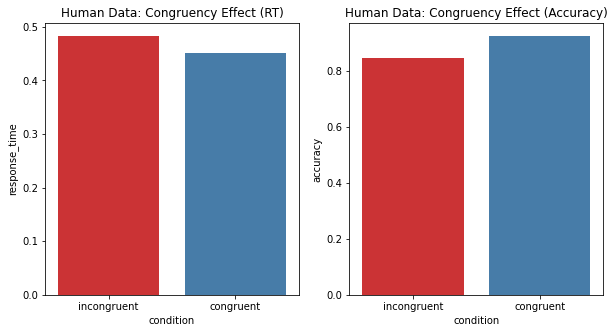

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x="condition", y="response_time",data=BOKSEM1, ax=axes[0], palette="Set1").set(title='Human Data: Congruency Effect (RT)')
sns.barplot(x="condition", y="accuracy", data=BOKSEM1, ax=axes[1], palette="Set1").set(title='Human Data: Congruency Effect (Accuracy)')
plt.show()

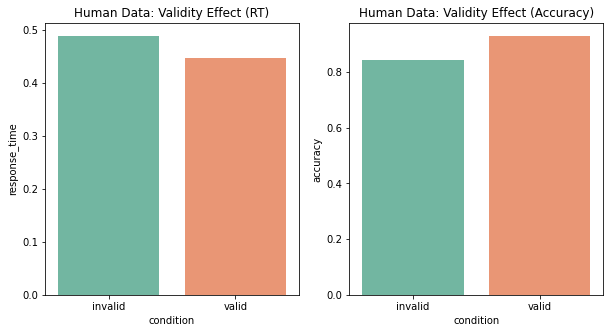

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x="condition", y="response_time",data=BOKSEM2, ax=axes[0], palette="Set2").set(title='Human Data: Validity Effect (RT)')
sns.barplot(x="condition", y="accuracy", data=BOKSEM2, ax=axes[1], palette="Set2").set(title='Human Data: Validity Effect (Accuracy)')
plt.show()

### Model data

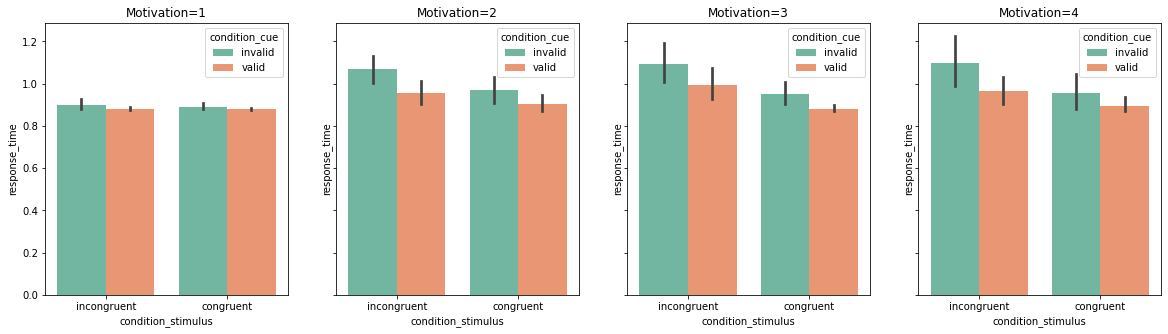

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation=1')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation=2')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation=3')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv4.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation=4')
plt.show()

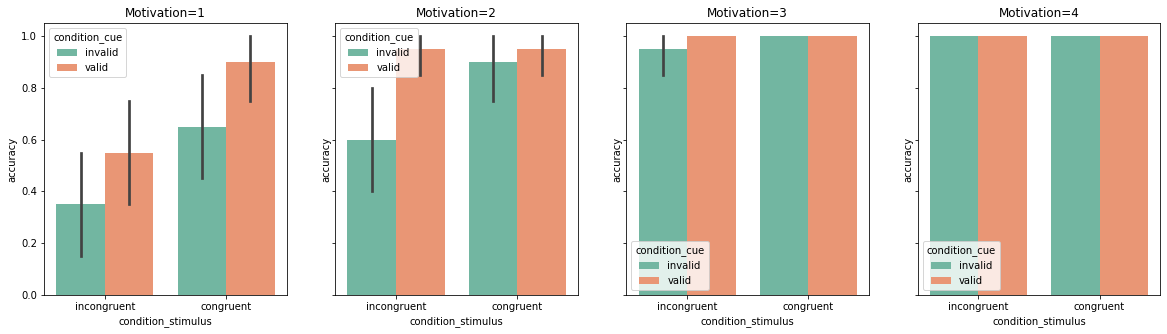

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation=1')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation=2')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation=3')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv4.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation=4')
plt.show()

### Post Error Speeding

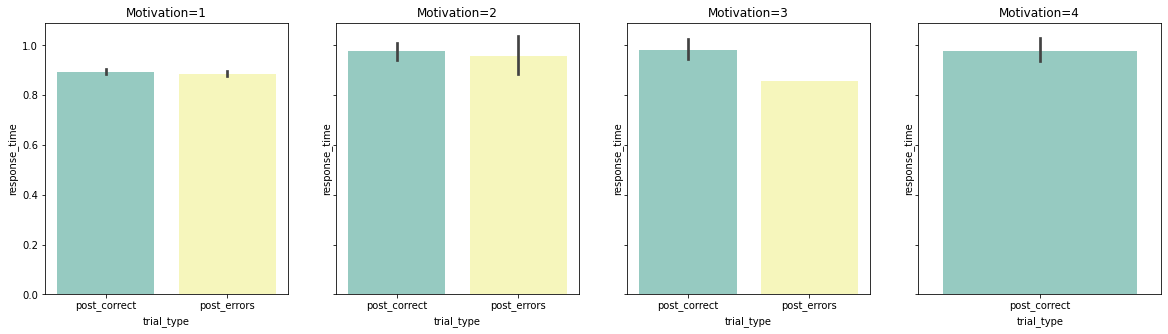

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv1.df_stats_post_error(), ax=axes[0]).set(title='Motivation=1')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv2.df_stats_post_error(), ax=axes[1]).set(title='Motivation=2')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv3.df_stats_post_error(), ax=axes[2]).set(title='Motivation=3')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv4.df_stats_post_error(), ax=axes[3]).set(title='Motivation=4')
plt.show()

## Disable reward delivery

The simulation below disabled reward dellivery

In [21]:
task_motiv1 = run_experiment(model="simon-model3", visible=False, trace=False)

# CONGRUENT-VALID (N=20): Accuracy = 0.90, Response Times = 880.30 ms
# CONGRUENT-INVALID (N=20): Accuracy = 0.65, Response Times = 891.35 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.50, Response Times = 882.35 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.35, Response Times = 897.10 ms

######### LOADED MODEL simon-model3 #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 0.90, Response Times = 880.30 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.65, Response Times = 891.35 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.50, Response Times = 882.35 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.35, Response Times = 897.10 ms


In [23]:
task_motiv2 = run_experiment(model="simon-model3", visible=False, trace=False)

# CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 871.95 ms
# CONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 953.85 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 959.90 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.60, Response Times = 1069.95 ms

######### LOADED MODEL simon-model3 #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 871.95 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 953.85 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 959.90 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.60, Response Times = 1069.95 ms


In [25]:
task_motiv3 = run_experiment(model="simon-model3", visible=False, trace=False)

# CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 921.30 ms
# CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 954.15 ms
# INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 972.75 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.85, Response Times = 1150.50 ms

######### LOADED MODEL simon-model3 #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 921.30 ms
CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 954.15 ms
INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 972.75 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.85, Response Times = 1150.50 ms


In [28]:
task_motiv10 = run_experiment(model="simon-model3", visible=False, trace=False)

# CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 953.95 ms
# CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 989.25 ms
# INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 1017.75 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 1377.60 ms

######### LOADED MODEL simon-model3 #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 953.95 ms
CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 989.25 ms
INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 1017.75 ms
INCONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 1377.60 ms


### Model data

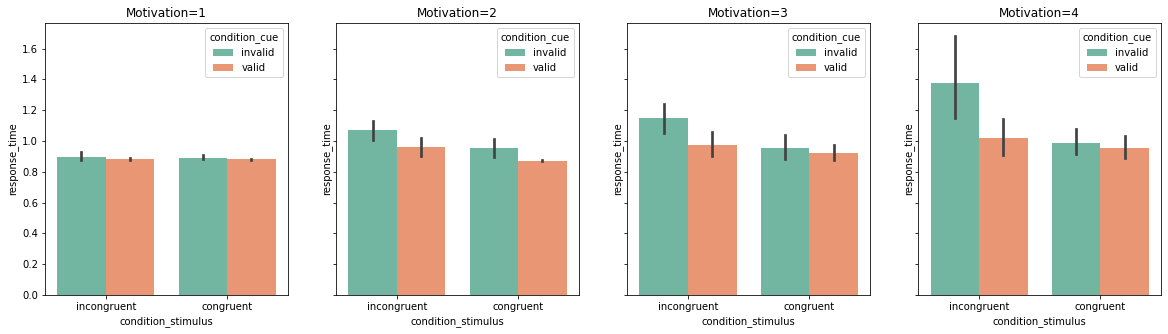

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation=1')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation=2')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation=3')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv10.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation=10')
plt.show()

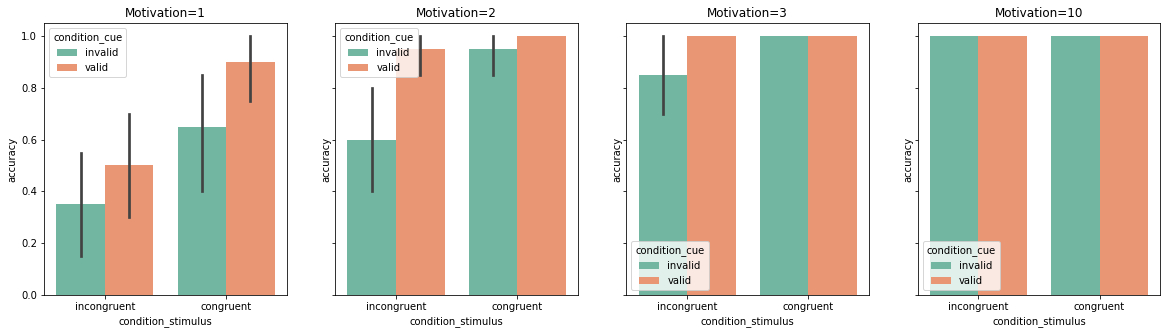

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation=1')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation=2')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation=3')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv10.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation=10')
plt.show()

### Post Error Slowing

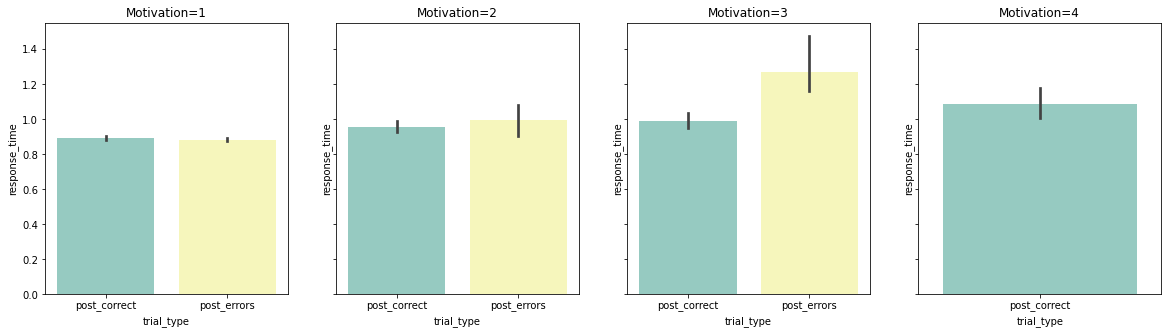

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv1.df_stats_post_error(), ax=axes[0]).set(title='Motivation=1')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv2.df_stats_post_error(), ax=axes[1]).set(title='Motivation=2')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv3.df_stats_post_error(), ax=axes[2]).set(title='Motivation=3')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv10.df_stats_post_error(), ax=axes[3]).set(title='Motivation=4')
plt.show()